In [2]:
# Immporting Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

In [5]:
# Importing Bank Loan csv file
df = pd.read_csv(r"C:\Users\vansh\OneDrive\Desktop\python\Loan Approval.csv")

In [53]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,N,5849,0,126,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,N,4583,1508,128,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Y,3000,0,66,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,N,2583,2358,120,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,N,6000,0,141,360,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,N,2900,0,71,360,1,Rural,Y
610,LP002979,Male,Yes,3,Graduate,N,4106,0,40,180,1,Rural,Y
611,LP002983,Male,Yes,1,Graduate,N,8072,240,253,360,1,Urban,Y
612,LP002984,Male,Yes,2,Graduate,N,7583,0,187,360,1,Urban,Y


In [8]:
# Filling null Values with mode for better data visualization

for col in ['Self_Employed']:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)

In [10]:
for col in ['Married']:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)

In [12]:
for col in ['Gender']:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)

In [40]:
# Firstly change datatype of dependents to str to remove + and after removing changed it to int

# df['Dependents'] = df['Dependents'].astype(str)
# df['Dependents'] = df['Dependents'].replace('3+','3')
# for col in ['Dependents']:
#     mode_value = df[col].mode()[0]
#     df[col].fillna(mode_value, inplace=True)
df['Dependents'] = df['Dependents'].astype(int)

In [41]:
# Those who got loan approved will have a median value in their null rows

median_approved = df.loc[df['Loan_Status']=='Y', 'LoanAmount'].median()
df.loc[(df['Loan_Status']=='Y') & (df['LoanAmount'].isna()), 'LoanAmount'] = median_approved

In [45]:
# Those who don't get their Loan approved will get 0 Loan Amount

df['LoanAmount'] = pd.to_numeric(df['LoanAmount'], errors='coerce').fillna(0).astype(int)

In [ ]:
for col in ['Credit_History']:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)

In [ ]:
for col in ['Loan_Amount_Term']:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)

In [49]:
# Checking wheather any null value is left or not

df.columns[df.isnull().any()]

Index([], dtype='object')

In [50]:
df = df.astype({'CoapplicantIncome': int, 'Loan_Amount_Term': int, 'Credit_History': int})

In [52]:
df['Self_Employed'] = df['Self_Employed'].replace({'Yes': 'Y', 'No': 'N'})

In [54]:
df.describe(include=int)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.00000,614.000000,614.000000,614.000000
mean,0.744300,5403.459283,1621.24430,143.423453,342.410423,0.855049
std,1.009623,6109.041673,2926.24876,86.287277,64.428629,0.352339
min,0.000000,150.000000,0.00000,0.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.00000,100.000000,360.000000,1.000000
50%,0.000000,3812.500000,1188.50000,126.000000,360.000000,1.000000
75%,1.000000,5795.000000,2297.25000,164.750000,360.000000,1.000000
max,3.000000,81000.000000,41667.00000,700.000000,480.000000,1.000000


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Loan_ID            614 non-null    object
 1   Gender             614 non-null    object
 2   Married            614 non-null    object
 3   Dependents         614 non-null    int64 
 4   Education          614 non-null    object
 5   Self_Employed      614 non-null    object
 6   ApplicantIncome    614 non-null    int64 
 7   CoapplicantIncome  614 non-null    int64 
 8   LoanAmount         614 non-null    int64 
 9   Loan_Amount_Term   614 non-null    int64 
 10  Credit_History     614 non-null    int64 
 11  Property_Area      614 non-null    object
 12  Loan_Status        614 non-null    object
dtypes: int64(6), object(7)
memory usage: 62.5+ KB


Text(0.5, 1.0, 'Loan Amount Histogram')

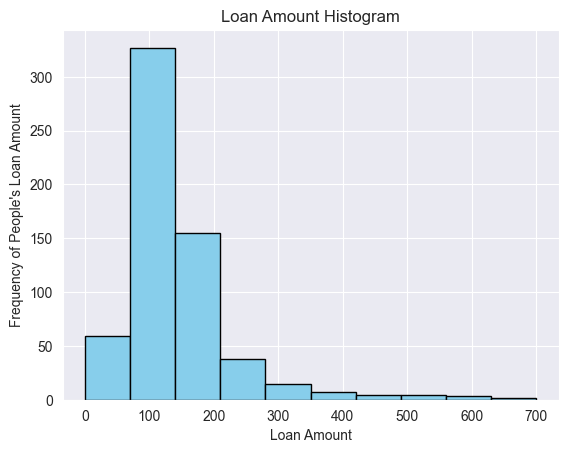

In [112]:
# Loan Amount that mostly People Are applying for

plt.hist(df['LoanAmount'], bins=10, color=['skyblue'], edgecolor='black')
plt.xlabel("Loan Amount")
plt.ylabel("Frequency of People's Loan Amount")
plt.title("Loan Amount Histogram")

Text(0.5, 1.0, "Applicant's Income Histogram")

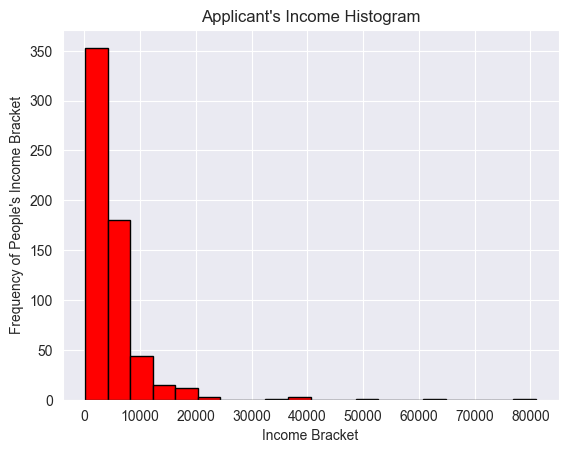

In [84]:
# Income Bracket of Applicants who are mostly applying for Loan

plt.hist(df['ApplicantIncome'], bins=20, color=['Red'], edgecolor='black')
plt.xlabel("Income Bracket")
plt.ylabel("Frequency of People's Income Bracket")
plt.title("Applicant's Income Histogram")

In [85]:
# Loan Approval Status By Gender
# Males got more Loan approval than Females

pd.crosstab(df['Gender'], df['Loan_Status'])

Loan_Status,N,Y
Gender,,
Female,37,75
Male,155,347


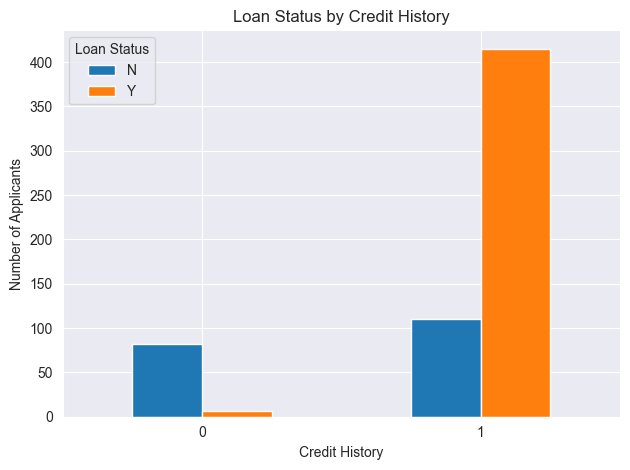

In [100]:
# Chances of approval increases when people got a Credit History

grouped = df.groupby(['Credit_History', 'Loan_Status']).size().unstack()

grouped.plot(kind='bar', stacked=False)
plt.title('Loan Status by Credit History')
plt.xlabel('Credit History')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=0)
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

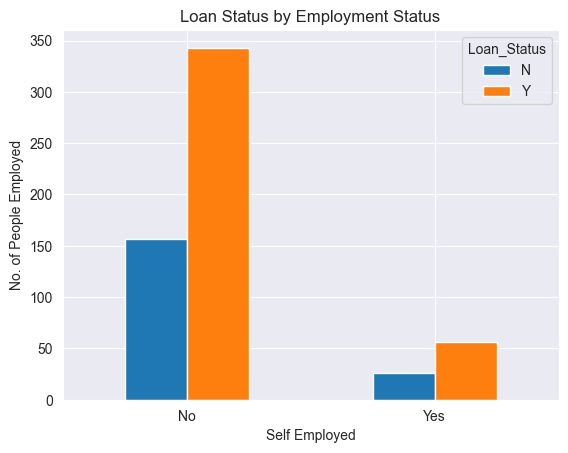

In [129]:
# Self Employed got fewer chances of Loan approval

pd.crosstab(df['Self_Employed'], df['Loan_Status']).plot(kind='bar')
plt.title('Loan Status by Employment Status')
plt.xlabel('Self Employed')
plt.ylabel('No. of People Employed')
plt.xticks(rotation=0)
plt.show()


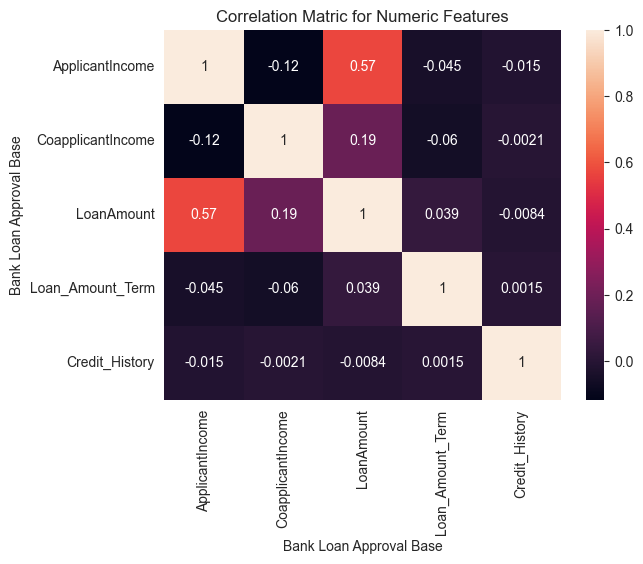

In [130]:
# Correlation matrix between all the numeric value

df_numeric = df.select_dtypes(include=['number'])
corr_matrix = df_numeric.corr(method = 'pearson')
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Bank Loan Approval Base')
plt.ylabel('Bank Loan Approval Base')
plt.show()

In [58]:
# Changing all the numeric values to check wheather any

df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype =='object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0,126,360,1,2,1
1,1,1,1,1,0,0,4583,1508,128,360,1,0,0
2,2,1,1,0,0,1,3000,0,66,360,1,2,1
3,3,1,1,0,1,0,2583,2358,120,360,1,2,1
4,4,1,0,0,0,0,6000,0,141,360,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0,71,360,1,0,1
610,610,1,1,3,0,0,4106,0,40,180,1,0,1
611,611,1,1,1,0,0,8072,240,253,360,1,2,1
612,612,1,1,2,0,0,7583,0,187,360,1,2,1


<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

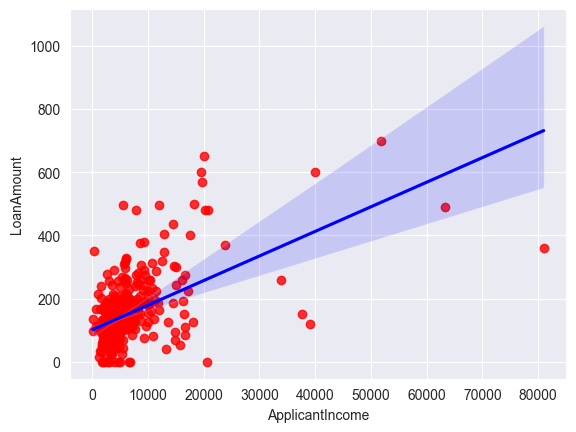

In [61]:
sns.regplot(x = 'ApplicantIncome', y= 'LoanAmount',data = df, scatter_kws={'color':'red'},line_kws={'color':'blue'})

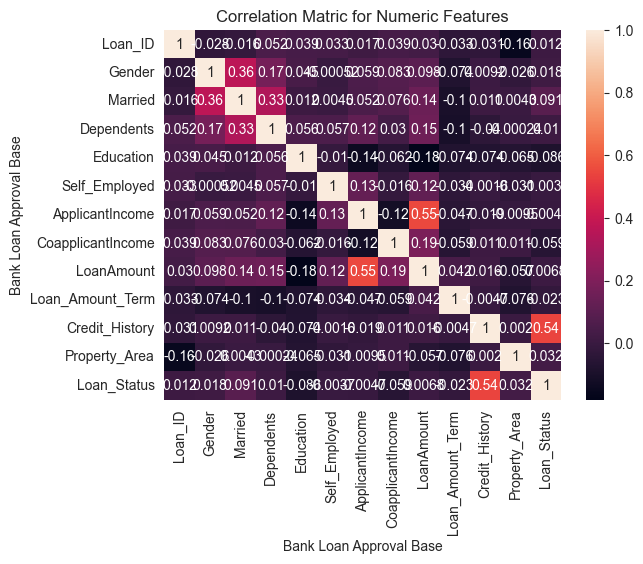

In [121]:
df_bank = df_numerized.select_dtypes(include=['number'])
corr_matrix = df_bank.corr(method = 'pearson')
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Bank Loan Approval Base')
plt.ylabel('Bank Loan Approval Base')
plt.show()

In [123]:
corr_mat = df_numerized.corr()
corr_pairs = corr_mat.unstack()
corr_pairs

Loan_ID      Loan_ID             1.000000
             Gender             -0.028029
             Married            -0.016013
             Dependents          0.051559
             Education           0.039442
                                   ...   
Loan_Status  LoanAmount          0.006776
             Loan_Amount_Term   -0.022549
             Credit_History      0.540556
             Property_Area       0.032112
             Loan_Status         1.000000
Length: 169, dtype: float64

In [124]:
sorted_pair = corr_pairs.sort_values()
sorted_pair

Education        LoanAmount       -0.179675
LoanAmount       Education        -0.179675
Loan_ID          Property_Area    -0.155416
Property_Area    Loan_ID          -0.155416
ApplicantIncome  Education        -0.140760
                                     ...   
Self_Employed    Self_Employed     1.000000
Gender           Gender            1.000000
Property_Area    Property_Area     1.000000
Credit_History   Credit_History    1.000000
Loan_Status      Loan_Status       1.000000
Length: 169, dtype: float64

In [125]:
high_corr = sorted_pair[(sorted_pair) > 0.5]
high_corr

Credit_History     Loan_Status          0.540556
Loan_Status        Credit_History       0.540556
LoanAmount         ApplicantIncome      0.550730
ApplicantIncome    LoanAmount           0.550730
Married            Married              1.000000
Loan_ID            Loan_ID              1.000000
Dependents         Dependents           1.000000
Education          Education            1.000000
Loan_Amount_Term   Loan_Amount_Term     1.000000
LoanAmount         LoanAmount           1.000000
CoapplicantIncome  CoapplicantIncome    1.000000
ApplicantIncome    ApplicantIncome      1.000000
Self_Employed      Self_Employed        1.000000
Gender             Gender               1.000000
Property_Area      Property_Area        1.000000
Credit_History     Credit_History       1.000000
Loan_Status        Loan_Status          1.000000
dtype: float64

In [ ]:
# Loan Status is directly correlated to Credit_History and Loan Amount is Correlated to Applicant Income